In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
data_dir = "../input/disease-prediction-using-machine-learning"
train_df = pd.read_csv(r".\Testing.csv")
test_df = pd.read_csv(r".\Testing.csv")
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [8]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [9]:
# display 30-60. indices of columns. 
train_df.columns[30:60]

Index(['indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation',
       'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine',
       'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload',
       'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise',
       'blurred_and_distorted_vision', 'phlegm', 'throat_irritation',
       'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion',
       'chest_pain', 'weakness_in_limbs', 'fast_heart_rate',
       'pain_during_bowel_movements'],
      dtype='object')

In [10]:
# all of these are encoded data and types are integer.
train_df["indigestion"]

0     0
1     0
2     0
3     0
4     0
5     1
6     0
7     0
8     0
9     0
10    0
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
Name: indigestion, dtype: int64

In [11]:
train_df["prognosis"].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

prognosis
Fungal infection                           2
Hepatitis C                                1
Hepatitis E                                1
Alcoholic hepatitis                        1
Tuberculosis                               1
Common Cold                                1
Pneumonia                                  1
Dimorphic hemmorhoids(piles)               1
Heart attack                               1
Varicose veins                             1
Hypothyroidism                             1
Hyperthyroidism                            1
Hypoglycemia                               1
Osteoarthristis                            1
Arthritis                                  1
(vertigo) Paroymsal  Positional Vertigo    1
Acne                                       1
Urinary tract infection                    1
Psoriasis                                  1
Hepatitis D                                1
Hepatitis B                                1
Allergy                                    1


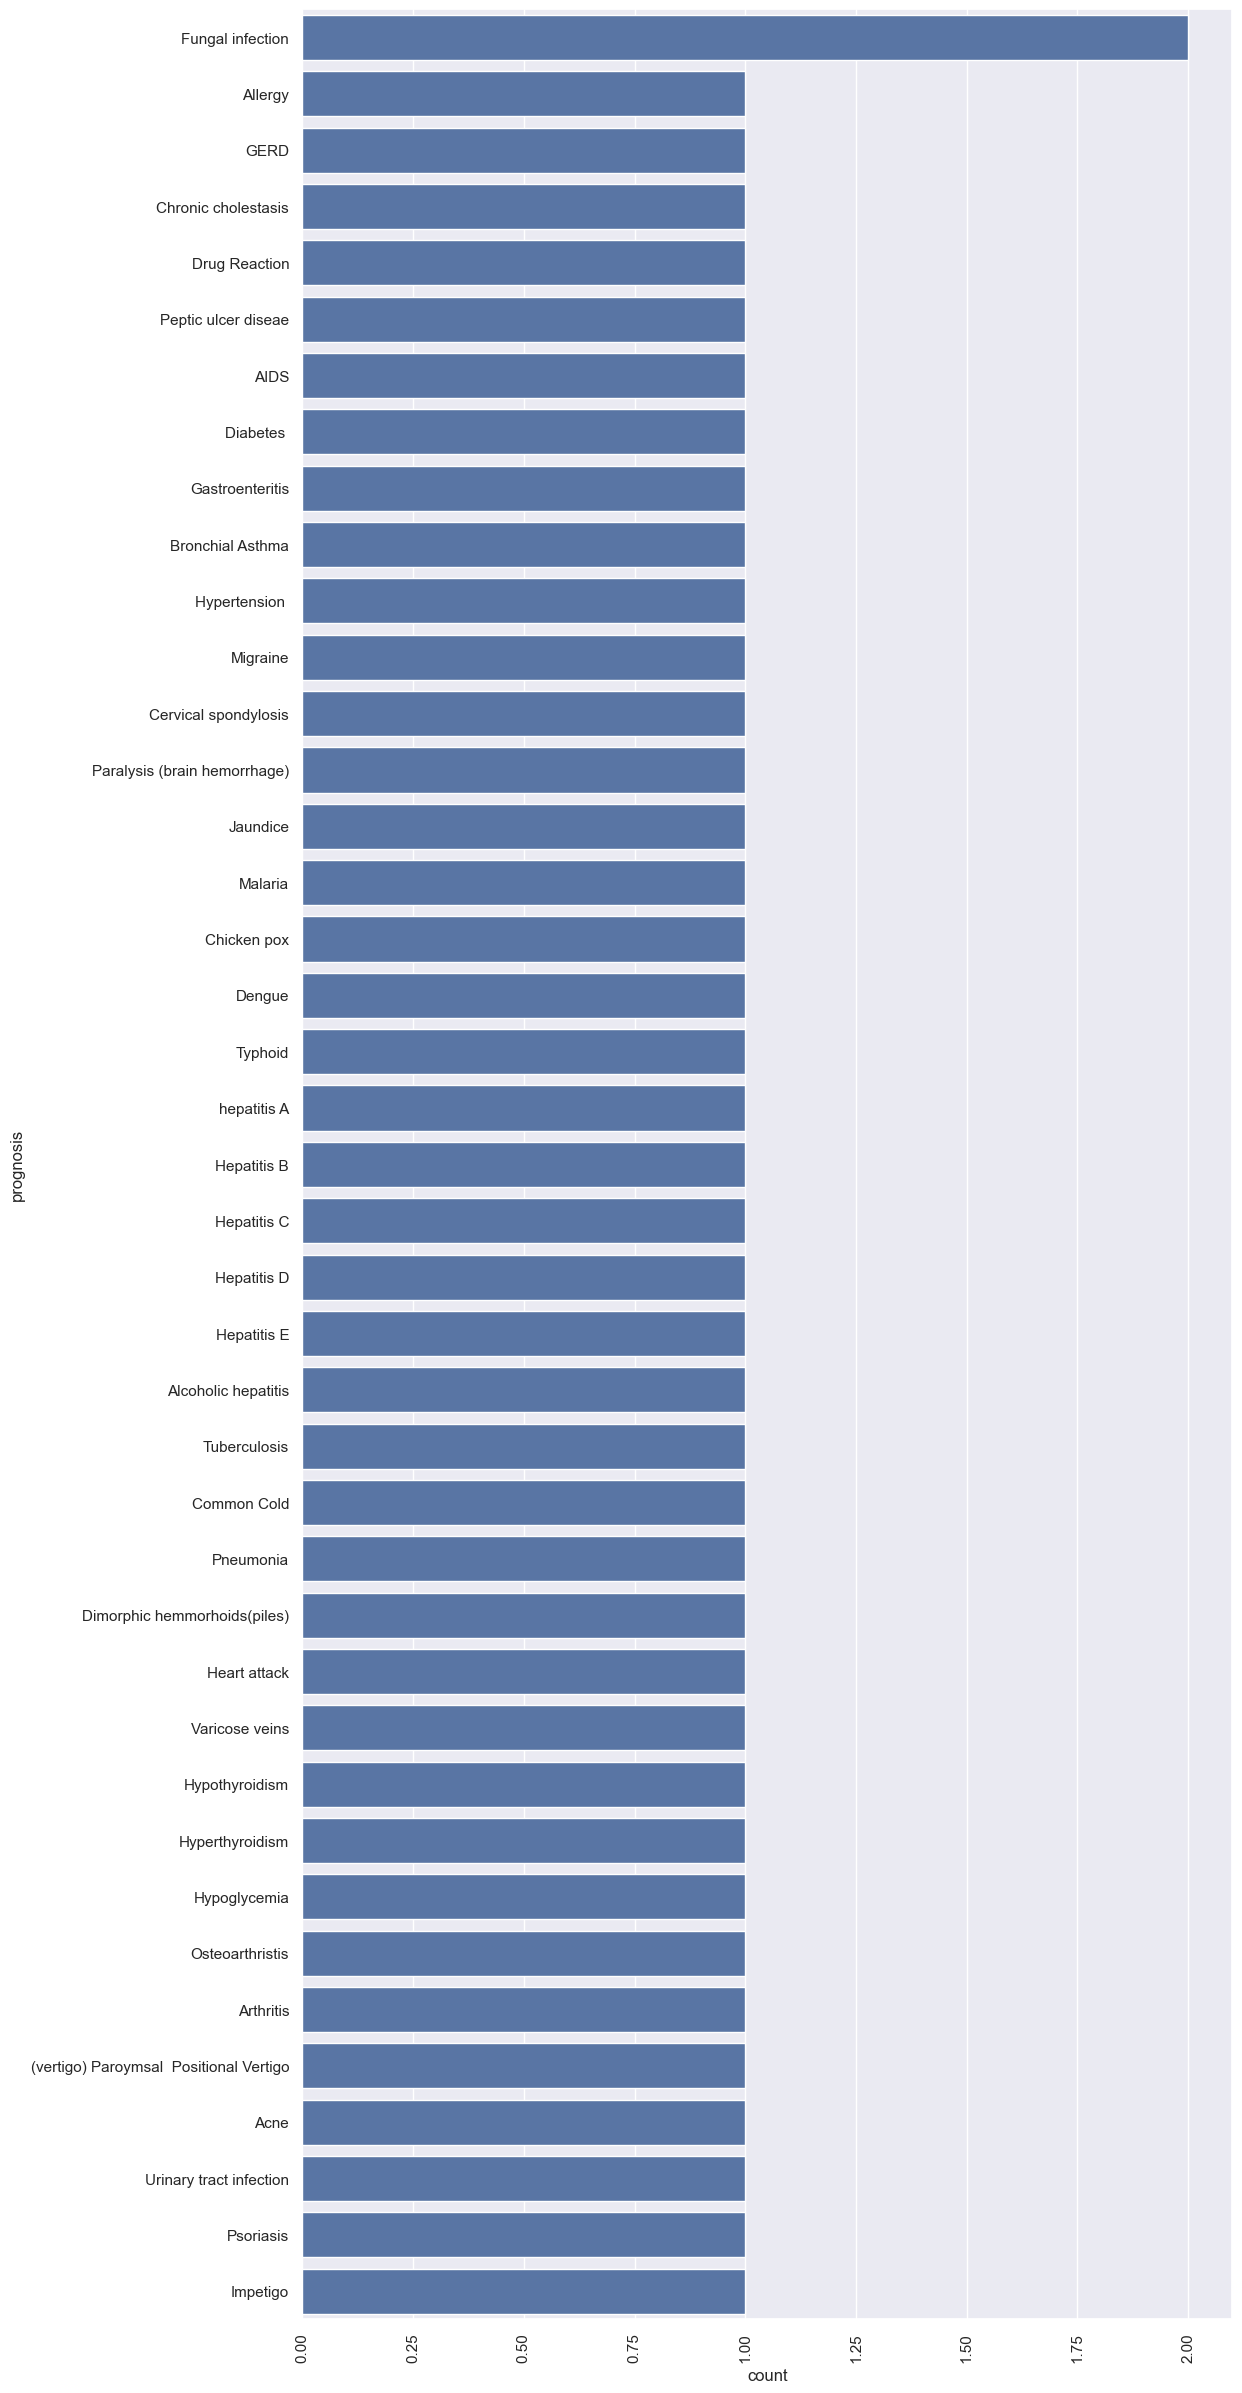

In [12]:
# the data is balanced for classification training. lets see value counts and also visualize them
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,30))
plt.xticks(rotation = 90)
sns.countplot(y="prognosis", data=train_df)
print(train_df["prognosis"].value_counts())

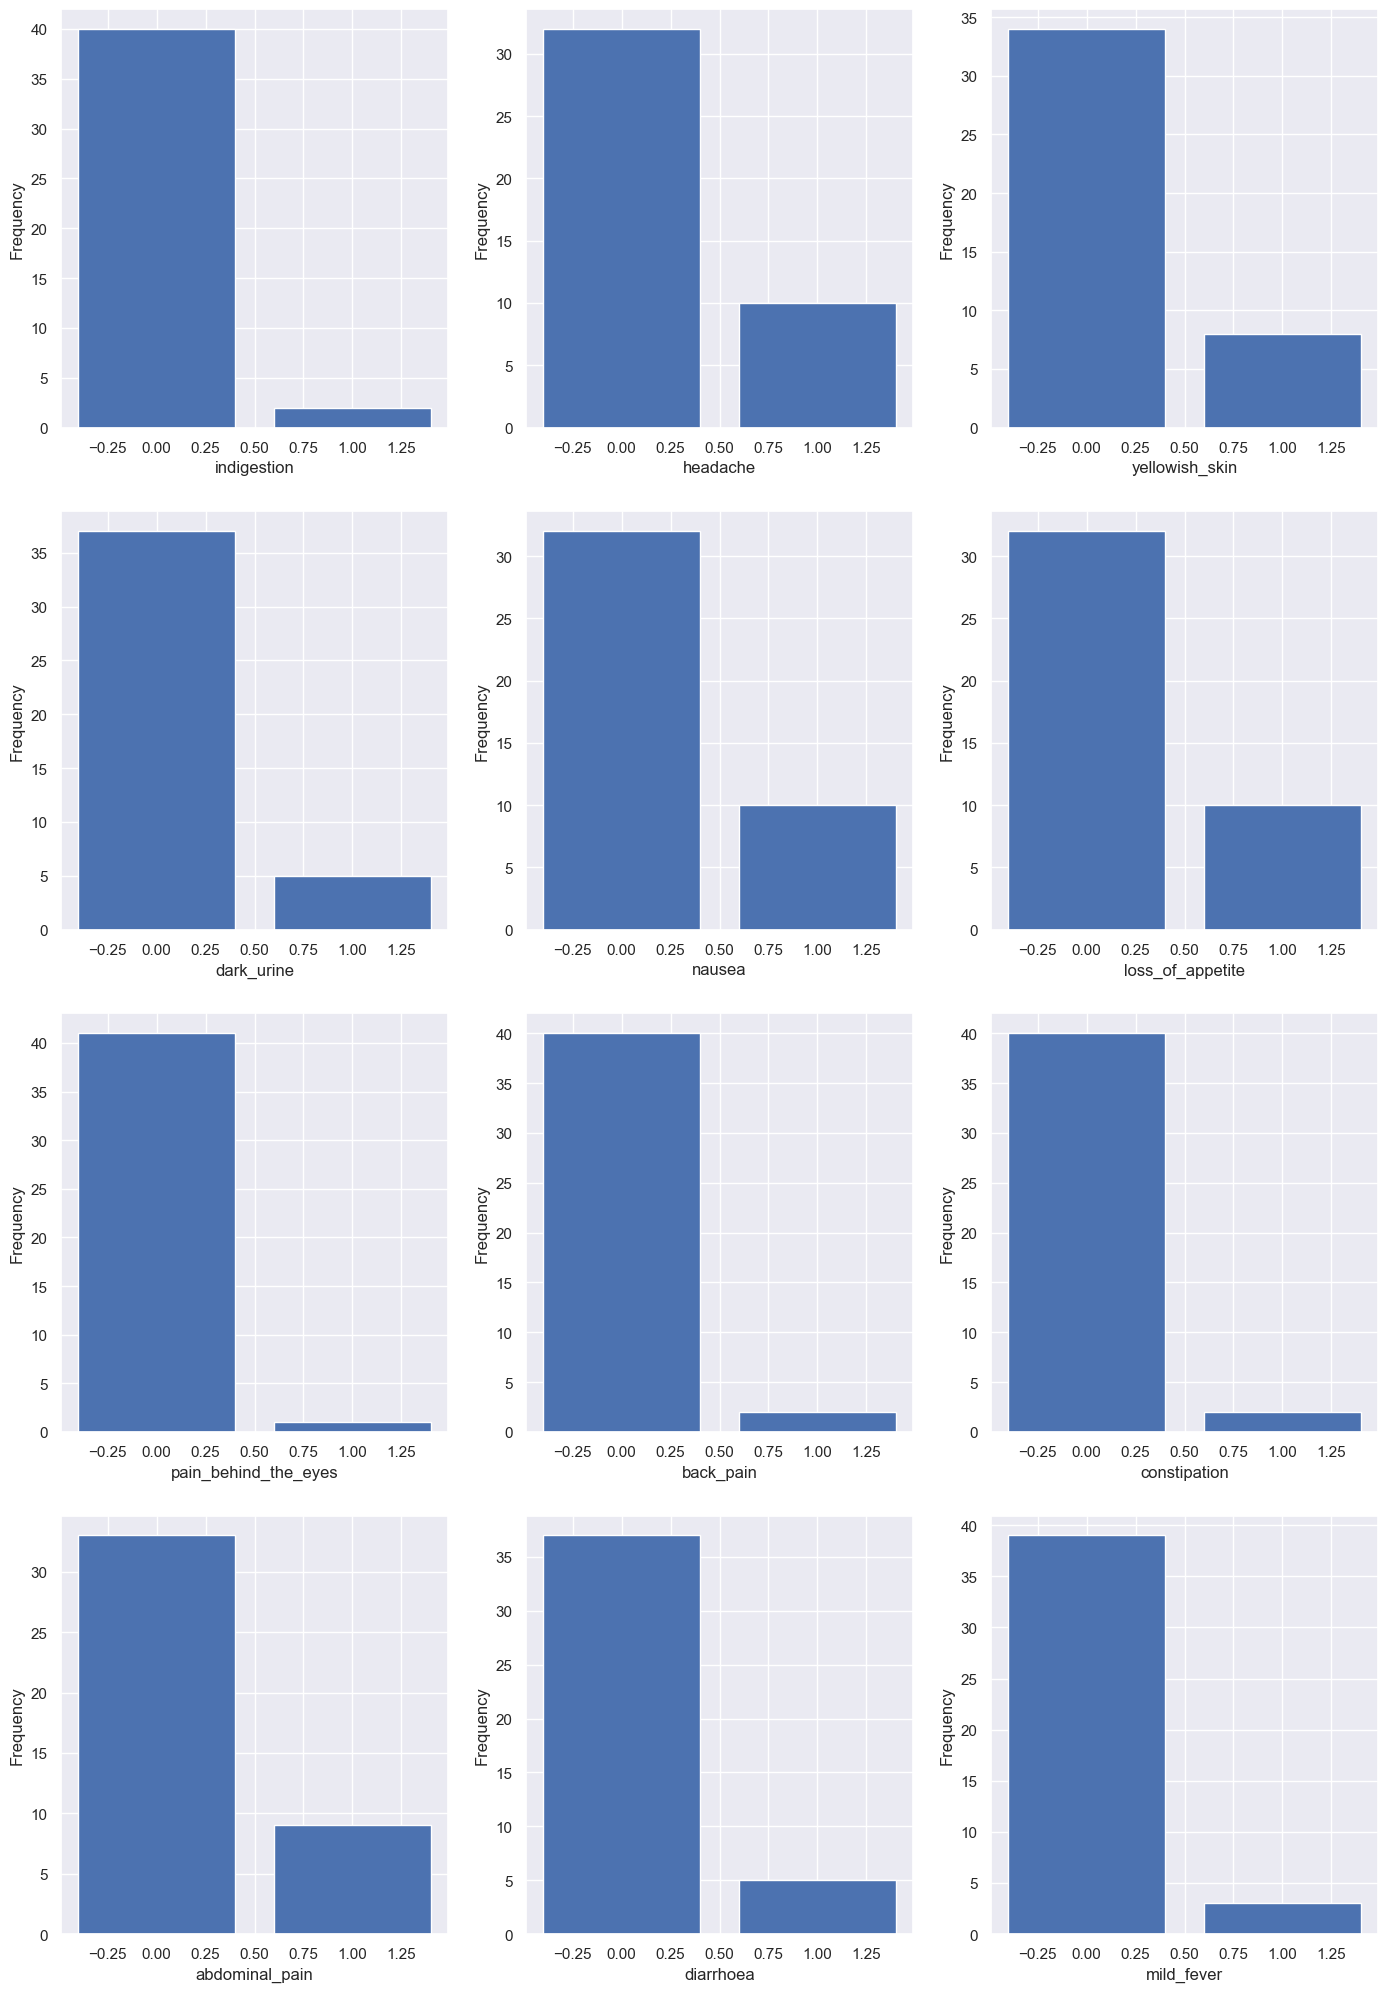

In [13]:
# lets visualize some of features
features = ['indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation',
       'abdominal_pain', 'diarrhoea', 'mild_fever']

plt.figure(figsize = (17,25))
for i, feature in enumerate(features):
    plt.subplot(4,3,i+1)
    plt.bar(train_df[feature].value_counts().index.to_numpy(), train_df[feature].value_counts().values)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.show()

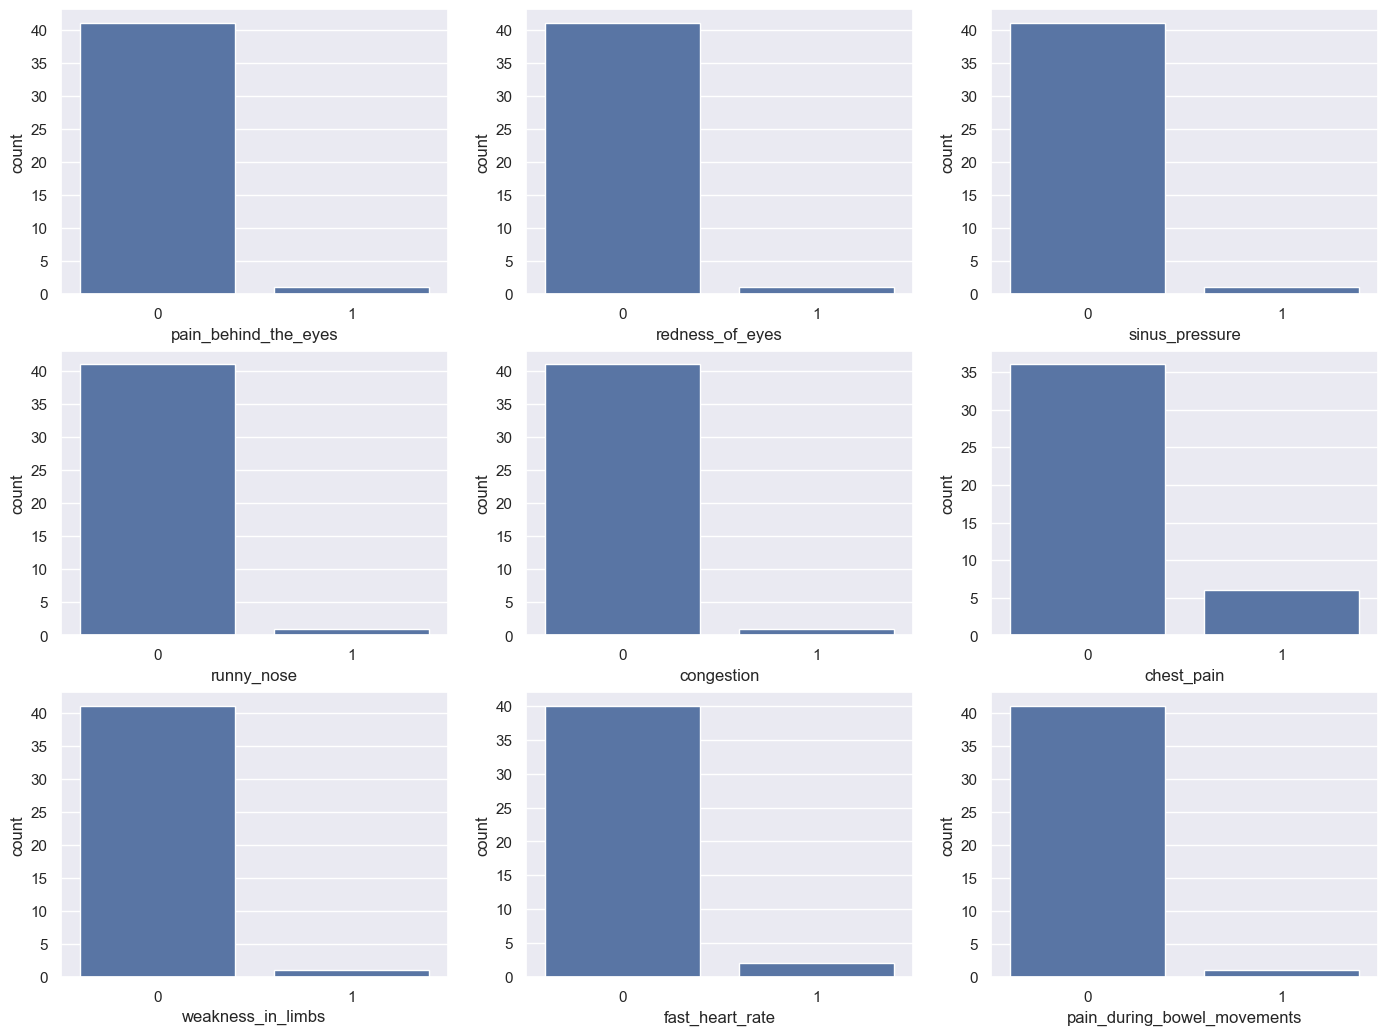

In [14]:
# visualize it with seaborn library one more time
features = ['pain_behind_the_eyes', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion',
       'chest_pain', 'weakness_in_limbs', 'fast_heart_rate',
       'pain_during_bowel_movements']

plt.figure(figsize = (17,17))
for i, feature in enumerate(features):
    plt.subplot(4,3,i+1)
    sns.countplot(x = feature, data = train_df)
    plt.xlabel(feature)
plt.show()

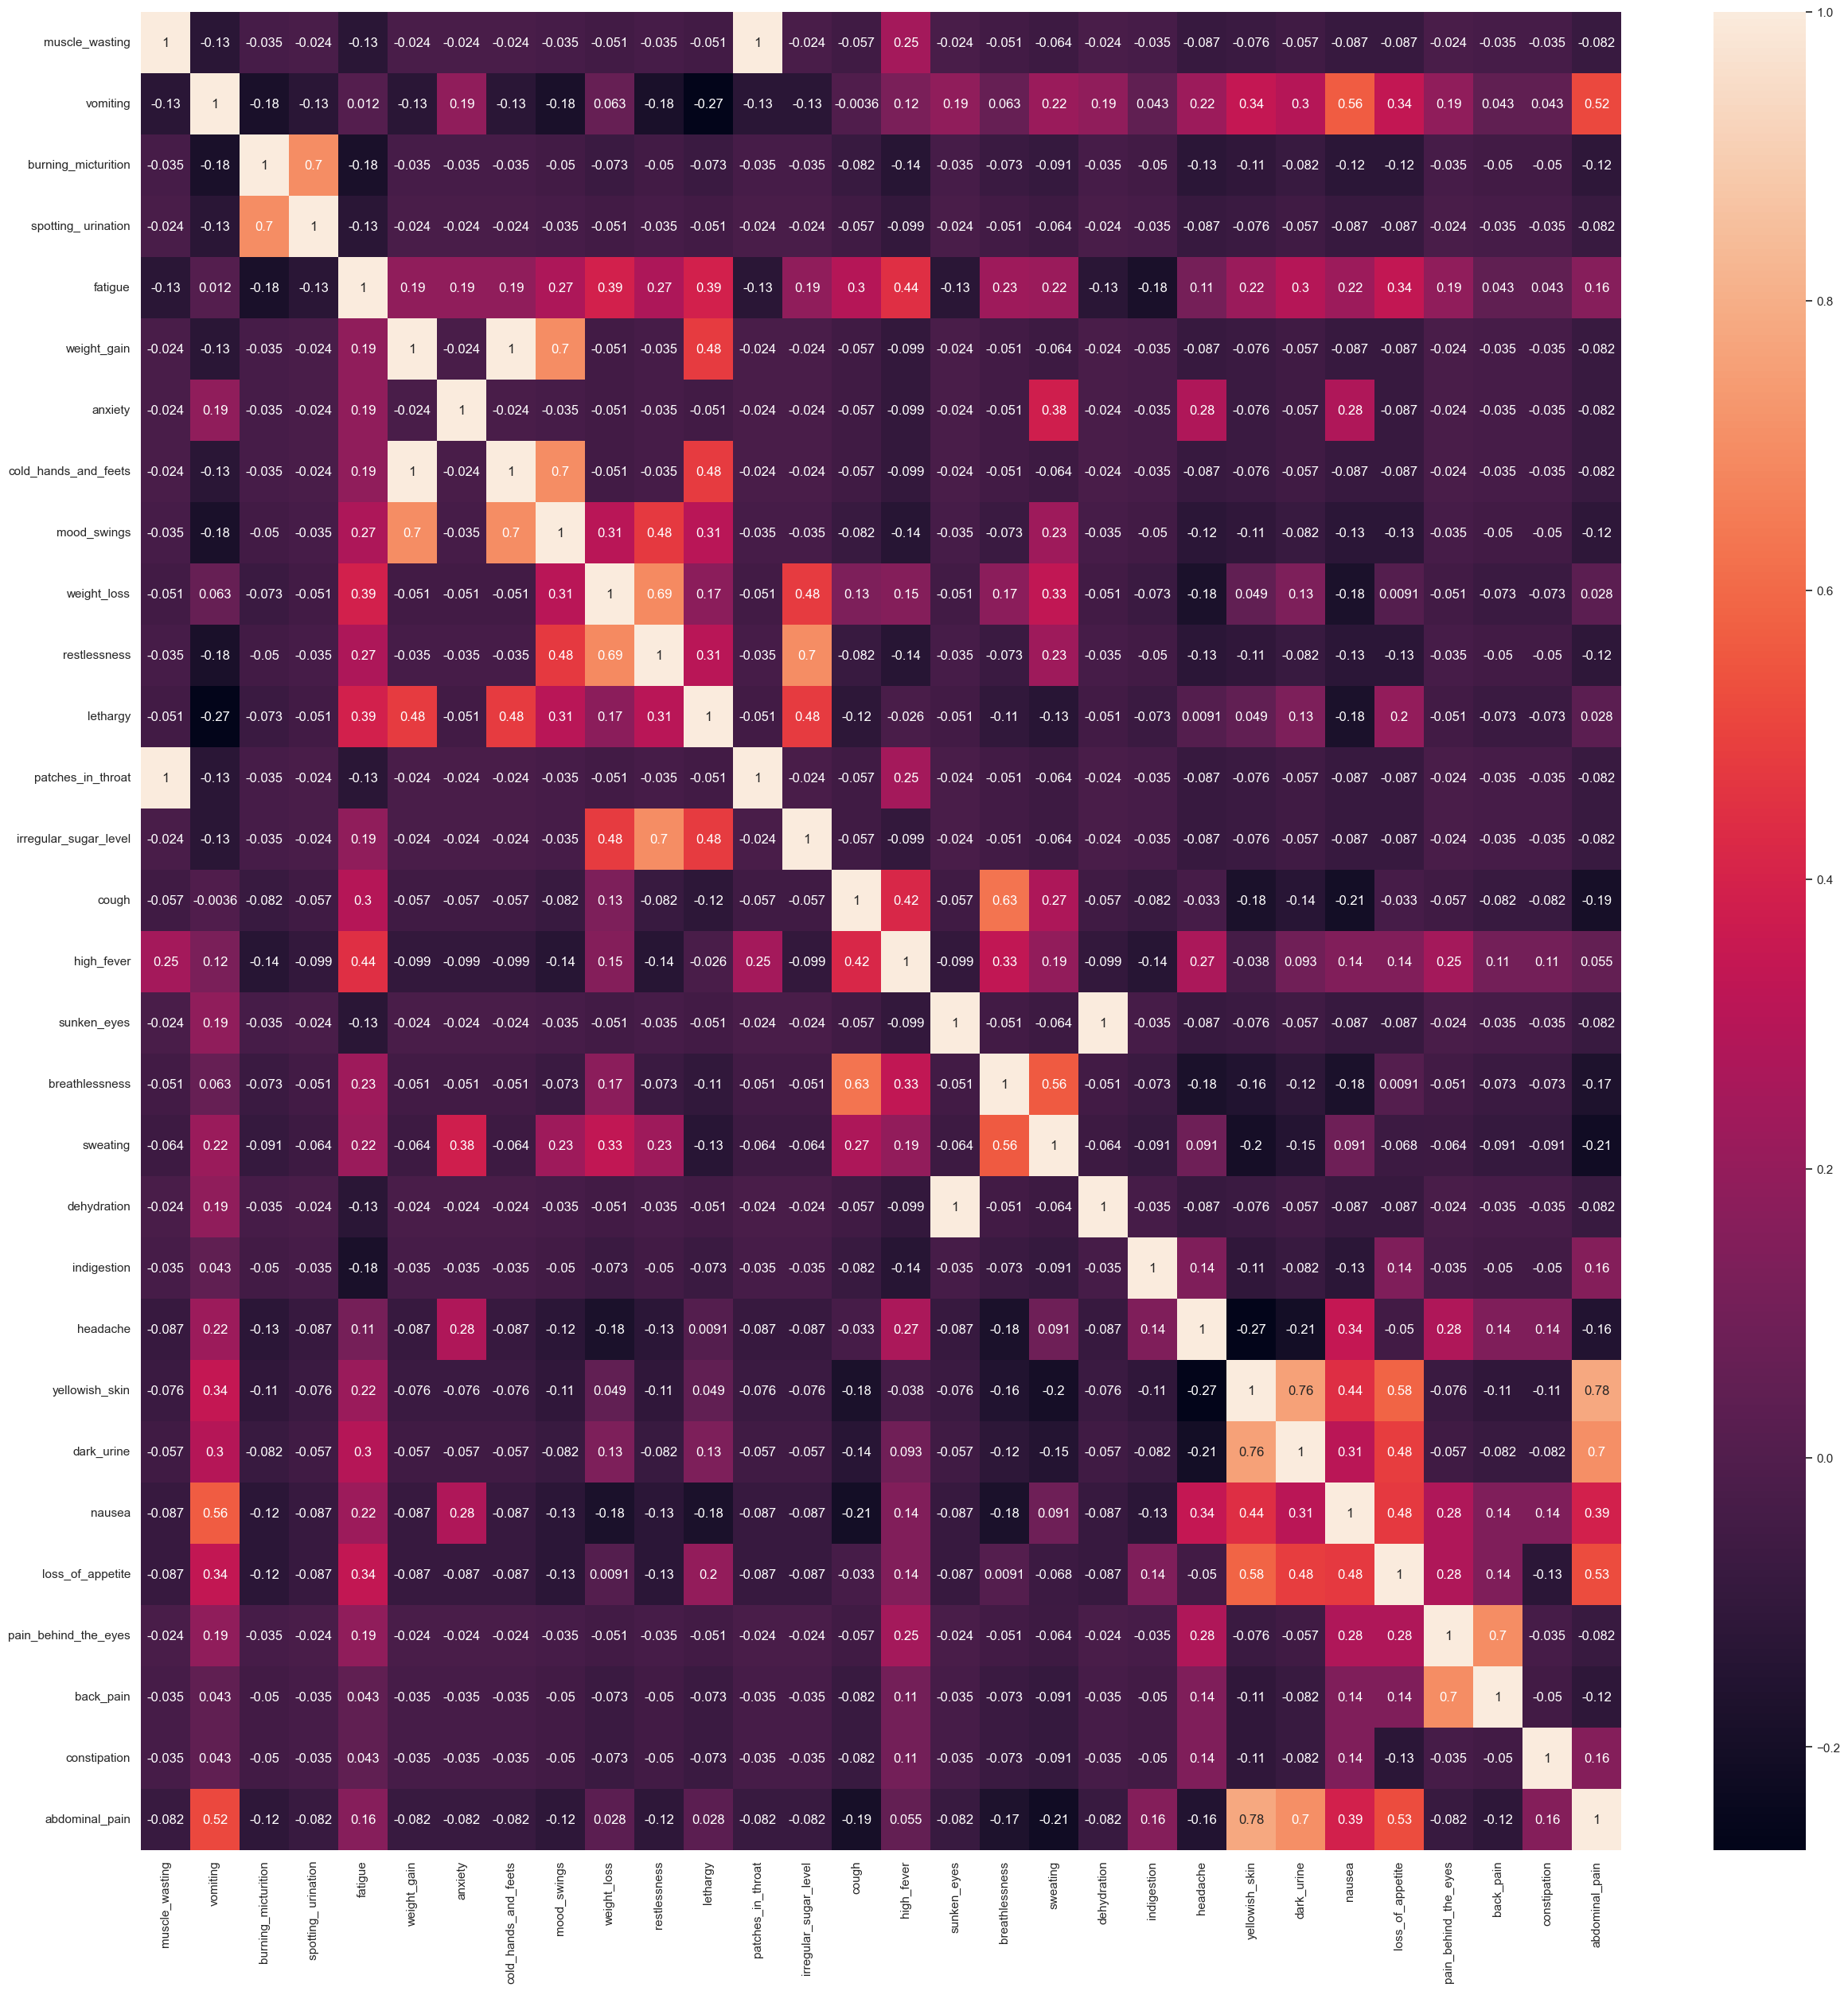

In [15]:
# linear relationships between some of features using correlation heatmap: for example which symptoms occur together?
df_corr = train_df.iloc[:, 10:40]
plt.figure(figsize = (30, 30))
sns.heatmap(df_corr.corr(), annot = True)
plt.show()

In [17]:
# drop unnamed feature from train data
train_df.drop("Unnamed: 133", axis = 1, inplace = True)
# train_df["Unnamed: 133"]  # it's not here anymore


KeyError: "['Unnamed: 133'] not found in axis"

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [19]:
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [20]:
# Modelling
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  # k = 5
x_train, y_train = train_df.loc[:,train_df.columns != "prognosis"], train_df.loc[:,"prognosis"]
x_test, y_test = test_df.loc[:,train_df.columns != "prognosis"], test_df.loc[:,"prognosis"]
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("Prediction list: {}".format(prediction[0:20]))
print("With KNN (K=5) accuracy is: ",knn.score(x_test, y_test))

Prediction list: ['Acne' 'AIDS' 'GERD' 'Chronic cholestasis' 'Acne' 'Chronic cholestasis'
 'AIDS' 'Diabetes ' 'Gastroenteritis' 'AIDS' 'Cervical spondylosis'
 'Hypertension ' 'AIDS' 'Gastroenteritis' 'Chronic cholestasis'
 'Gastroenteritis' 'Chicken pox' 'Chicken pox' 'Gastroenteritis'
 'Chronic cholestasis']
With KNN (K=5) accuracy is:  0.2619047619047619


In [21]:
neighbors = np.arange(1,25)   # for k tuning
train_accuracy = []
test_accuracy = []
# Loop for different k values
for i, k in enumerate(neighbors):
    # k from 1 to 25 (excluded)
    knn = KNeighborsClassifier(n_neighbors = k)
    # fit the knn
    knn.fit(x_train, y_train)
    # train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

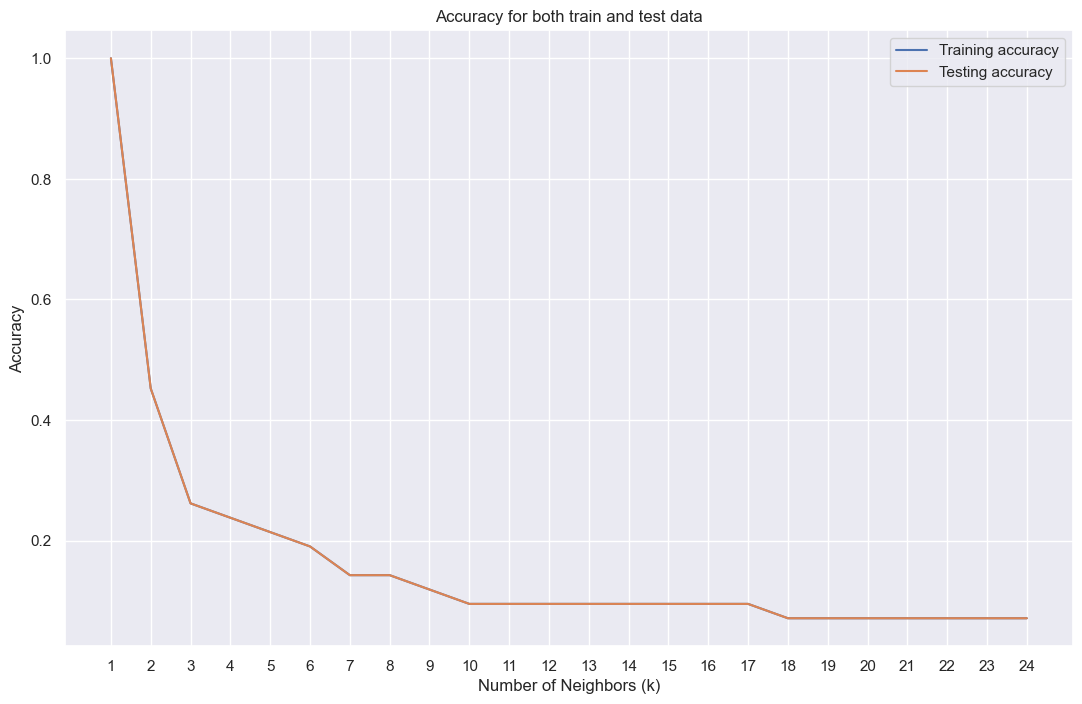

In [22]:
# Plot the accuracies
plt.figure(figsize = (13,8))
plt.plot(neighbors, train_accuracy, label = "Training accuracy")
plt.plot(neighbors, test_accuracy, label = "Testing accuracy")
plt.legend()
plt.title("Accuracy for both train and test data")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(neighbors)
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
k = 5 # for K-fold cross validation
cv_result = cross_val_score(knn, x_train, y_train, cv = k) # uses R^2 score
print("CV scores: ", cv_result)
print("CV scores average: ", np.sum(cv_result)/len(cv_result))

ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train, y_train)
dt.predict(x_test)
dt.score(x_test, y_test)

1.0

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42, n_estimators = 100)
rfc.fit(x_train, y_train)
rfc.predict(x_test)
rfc.score(x_test, y_test)

1.0

In [26]:
from sklearn.svm import SVC
svc = SVC(gamma = "auto", kernel = "rbf" )
svc.fit(x_train, y_train)
svc.predict(x_test)
svc.score(x_test, y_test)

0.047619047619047616

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(x_train, y_train)
logreg.predict(x_test)
logreg.score(x_test, y_test)

1.0

In [28]:
y_predictions = {"KNN": knn.predict(x_test),
          "SVC": svc.predict(x_test),
          "DT": dt.predict(x_test),
          "RFC": rfc.predict(x_test),
          "LOGREG": logreg.predict(x_test)}

from sklearn.metrics import classification_report, confusion_matrix

for classifier, y_pred in y_predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    print(classifier,'Confusion matrix: \n',cm)
    print("------------------")
    print(classifier, 'Classification report: \n',classification_report(y_test,y_pred))

KNN Confusion matrix: 
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
------------------
KNN Classification report: 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.17      1.00      0.29         1
                                   AIDS       0.33      1.00      0.50         1
                                   Acne       0.33      1.00      0.50         1
                    Alcoholic hepatitis       0.50      1.00      0.67         1
                                Allergy       0.00      0.00      0.00         1
                              Arthritis       0.25      1.00      0.40         1
                       Bronchial Asthma       0.00      0.00      0.00         1
                   Cervical spondylosis       0.00      0.00      0.00         1
                            Chicken pox       0.00      0.00      0.00        

c:\Users\hbsamur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hbsamur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hbsamur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera